# Lab 3: Thevenin and Norton Equivalents
ENGR 228\
Bob Smith (partner: Alice Jones)

## Introduction

A short paragraph which explains what the lab was about.  You can reference figures in the lab handout if that helps.

## 1. A simple resistor network to test Thevenin/Norton equivalents

What's this about?

| Resistor ID | Nominal R ($\Omega$) | Measured R ($\Omega$) | Percent Error (%) |
| ---         | ---                  | ---                   | ---               |
| $R_1$       | 130                  |                       |                   |
| $R_2$       | 560                  |                       |                   |
| $R_3$       | 300                  |                       |                   |

After we built it, ...

Explain the Python output in the following cell.

In [3]:
# Importing these packages lets us do everything we want in the code blocks below.
# NumPy is a matrix-based calculation package a lot like MATLAB.
# Matplotlib is a graphing and visualization toolkit (sort of like the plotting functionality of MATLAB).
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size': 18, 'axes.xmargin': 0})
np.set_printoptions(floatmode='fixed', precision=4)

Rnom = np.array([130, 560, 300])           # nominal resistances
Rmeas = np.array([0, 0, 0])          # measured resistances
print("% errors between measured and nominal resistances = {}".format(100*(Rmeas - Rnom)/Rnom))

# NOTE:  It is up to you to choose the units for voltage, current, and resistance, and update this code to express them (and calculate with them) correctly!

Vs = 10   # change this if you measured your actual power-supply voltage

Rth_calc = Rmeas[2] + (Rmeas[0] * Rmeas[1]) / (Rmeas[0] + Rmeas[1])    # Rth (using measured resistance values) = (R1||R2)+R3
Rth_meas = 0    # measured Rth
print("Thevenin resistance Rth = {:.2f} Ω (measured), {:.2f} Ω (calculated), {:.2f} % error".format(Rth_meas, Rth_calc, 100*(Rth_meas - Rth_calc)/Rth_calc))

Vth_calc = 0    # write a formula here to calculate Vth (using Rmeas and Vs)
Vth_meas = 0
print("Thevenin voltage Vth = {:.2f} V (measured), {:.2f} V (calculated), {:.2f} % error".format(Vth_meas, Vth_calc, 100*(Vth_meas - Vth_calc)/Vth_calc))

IN_calc = 0     # write a formula here to calculate IN (using Rmeas and Vs)
IN_meas = 0
print("Norton current IN = {:.2f} A (measured), {:.2f} A (calculated), {:.2f} % error".format(IN_meas, IN_calc, 100*(IN_meas - IN_calc)/IN_calc))


% errors between measured and nominal resistances = [-100.0000 -100.0000 -100.0000]
Thevenin resistance Rth = 0.00 Ω (measured), nan Ω (calculated), nan % error


C:\Users\mark\AppData\Local\Temp\ipykernel_14676\256025712.py:18: RuntimeWarning: invalid value encountered in long_scalars
  Rth_calc = Rmeas[2] + (Rmeas[0] * Rmeas[1]) / (Rmeas[0] + Rmeas[1])    # Rth (using measured resistance values) = (R1||R2)+R3


ZeroDivisionError: division by zero

## 2. Observations with varying load resistance

Explain what's going on here (steps 5-7).

How were the values in the table below acquired?  Particularly the power.
(Note that the "measured power" is calculated here, but "calculated power" is from step 8 in the handout!)

| $R_L$ ($\Omega$) | $v_L$ (V) | $i_L$ (mA) | Measured $p_L$ (mW) | Calculated $p_L$ (mW) |
| ---              | ---       | ---        | ---                 | ---                   |
| 20               | 0.000     | 0.000      | 0.000               | 0.000                 |
| 35               | 0.000     | 0.000      | 0.000               | 0.000                 |
| 50               | 0.000     | 0.000      | 0.000               | 0.000                 |
| 100              | 0.000     | 0.000      | 0.000               | 0.000                 |
| 200              | 0.000     | 0.000      | 0.000               | 0.000                 |
| 300              | 0.000     | 0.000      | 0.000               | 0.000                 |
| 400              | 0.000     | 0.000      | 0.000               | 0.000                 |
| 500              | 0.000     | 0.000      | 0.000               | 0.000                 |
| 600              | 0.000     | 0.000      | 0.000               | 0.000                 |
| 800              | 0.000     | 0.000      | 0.000               | 0.000                 |
| 1000             | 0.000     | 0.000      | 0.000               | 0.000                 |

Comments on the results?  Particularly the power.

In [4]:
RL = np.array([20, 35, 50, 100, 200, 300, 400, 500, 600, 800, 1000])
vL = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
iL = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# This power is "measured" because we obtain it from measured voltage and current (vL and iL)
pL_meas = vL*iL
print('Power in the load from... = {} units here'.format(pL_meas))  # fix units!

Power in the load from... = [0 0 0 0 0 0 0 0 0 0 0] units here


The measured load voltage and current are plotted...

Here you should introduce the graph below, explain what is plotted, the significance of various key points on the linear fit, and so on.

In [5]:
# Perform a linear least-squares fit to the (iL,vL) measured data.  We do this because
# we expect that (iL,vL) will follow a linear relation, and any deviations from a perfect
# line are presumably due to error/noise.
N = len(vL)  # number of data points
A = np.vstack( [ iL, np.ones(N) ] ).T
result = np.linalg.lstsq(A, vL, rcond=None)
(m, b) = result[0]  # m is the slope and b is the y-intercept
rsquared = 1 - result[1] / (N * vL.var())
print("rsquared = {} for the linear least-squares fit".format(rsquared))

# Make a line from the slope and y-intercept we found above
x = np.linspace(0, np.max(iL), num=100)   # array of 100 evenly spaced x values
y = m*x + b

Vth_fit = # fixme!
Rth_fit = # fixme!
print("Thevenin parameters derived from the linear fit:  Vth = {:.2f} V and Rth = {:.2f} Ω".format(Vth_fit, Rth_fit))

# Plot the (iL,vL) data points as points, and the linear fit as a line going through the points.
fig, ax1 = plt.subplots(1, 1, figsize=(12,10))     # create the axis
ax1.plot(iL, vL, 'o', label=r"Measured data")      # plot the raw data points as points
ax1.plot(x, y, label=r"Least-squares fit")         # plot the linear fit as a line
#ax1.set_xlim(0,12)   # change as appropriate to your data
#ax1.set_ylim(0,3.6)
ax1.grid()
ax1.set_xlabel(r"Good x axis label")
ax1.set_ylabel(r"Example axis label with math symbols: $\sqrt{\rho^3}$")
ax1.set_title(r"Good title")
plt.legend(loc='upper left')  # make a legend using the "label" text of each plot cmd
plt.show()

SyntaxError: invalid syntax (1484383895.py, line 15)

Explain the different ways in which the Thevenin and Norton circuit parameters were obtained, so the reader can understand the following table.  Also note that you will probably need to grab the formula for the linear fit from the python code above, in order to fill in the last row of the table...

| Method                   | $V_{th}$ (V) | $I_N$ (mA) | $R_{th}$ ($\Omega$) |
| ---                      | ---          | ---        | ---                 |
| Calculated               | 0.000        | 0.000      | 0.000               |
| Measured                 |              |            |                     |
| Derived from linear fit  |              |            |                     |


## 3. Power in the load resistor

Explain what's going on here (steps 8-10).  If you want to include the formula, you could enter it using LaTeX syntax like this:
$$
p_L = \left( \frac{ V_{th} }{ R_{th} + R_L } \right)^2 R_L
$$

Explain how the graph below was obtained.

At this point you should discuss the Maximum Power Theorem and how it applies to your experiment.  Calculate the maximum power which $R_L$ could dissipate, and the value of $R_L$ where this should occur.  Are the results consistent with your plot?


ValueError: x and y must have same first dimension, but have shapes (11,) and (1,)

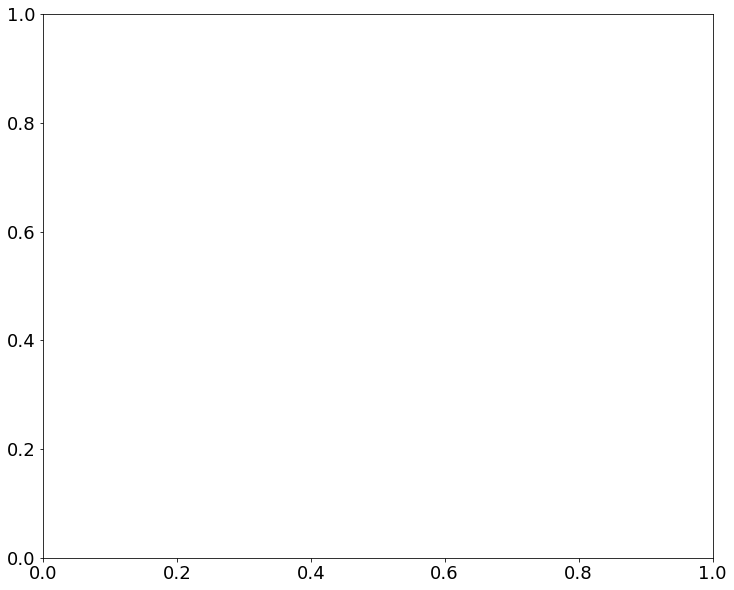

In [6]:
# Calculate the load power using trendline Vth and Rth and RL values dialed into the resistance box
pL_calc = 0  # use the formula from the lab handout here (exponentiation is ** in python)

# Plot the calculated load power and the measured load power, both vs load resistance
fig, ax2 = plt.subplots(1, 1, figsize=(12,10))     # create the axis
ax2.plot(RL, pL_calc, 'o', label=r"Calculated load power")  # plot the first data series as points
ax2.plot(RL, pL_meas, 'o', label=r"Measured load power")    # plot the second data series as points
#ax2.set_xlim(0,12)   # change as appropriate to your data
#ax2.set_ylim(0,3.6)
ax2.grid()
ax2.set_xlabel(r"Good x axis label")
ax2.set_ylabel(r"Example axis label with math symbols: $\sqrt{\rho^3}$")
ax2.set_title(r"Good title")
plt.legend(loc='upper left')  # make a legend using the "label" text of each plot cmd
plt.show()

## 4. Summary

Step 11 in the handout.